# Initial setup
Import all the libraries needed

In [1]:
from scipy import stats
from scipy.stats import skewnorm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from colorsetup import colors, palette

In [2]:
from sklearn.metrics import make_scorer, recall_score, precision_score
#Defining negative prediction based classification metrics
specificity = make_scorer(precision_score, pos_label = 0)
npv = make_scorer(recall_score, pos_label = 0)

In [3]:
filepath = 'SouthGermanCredit.txt'

In [4]:
df = pd.read_csv(filepath, sep = ' ')
data = pd.read_csv(filepath, sep = ' ')
columns = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'pstatus', 'other_debtors',
             'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job',
             'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
df.columns = columns
data.columns = columns
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,pstatus,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


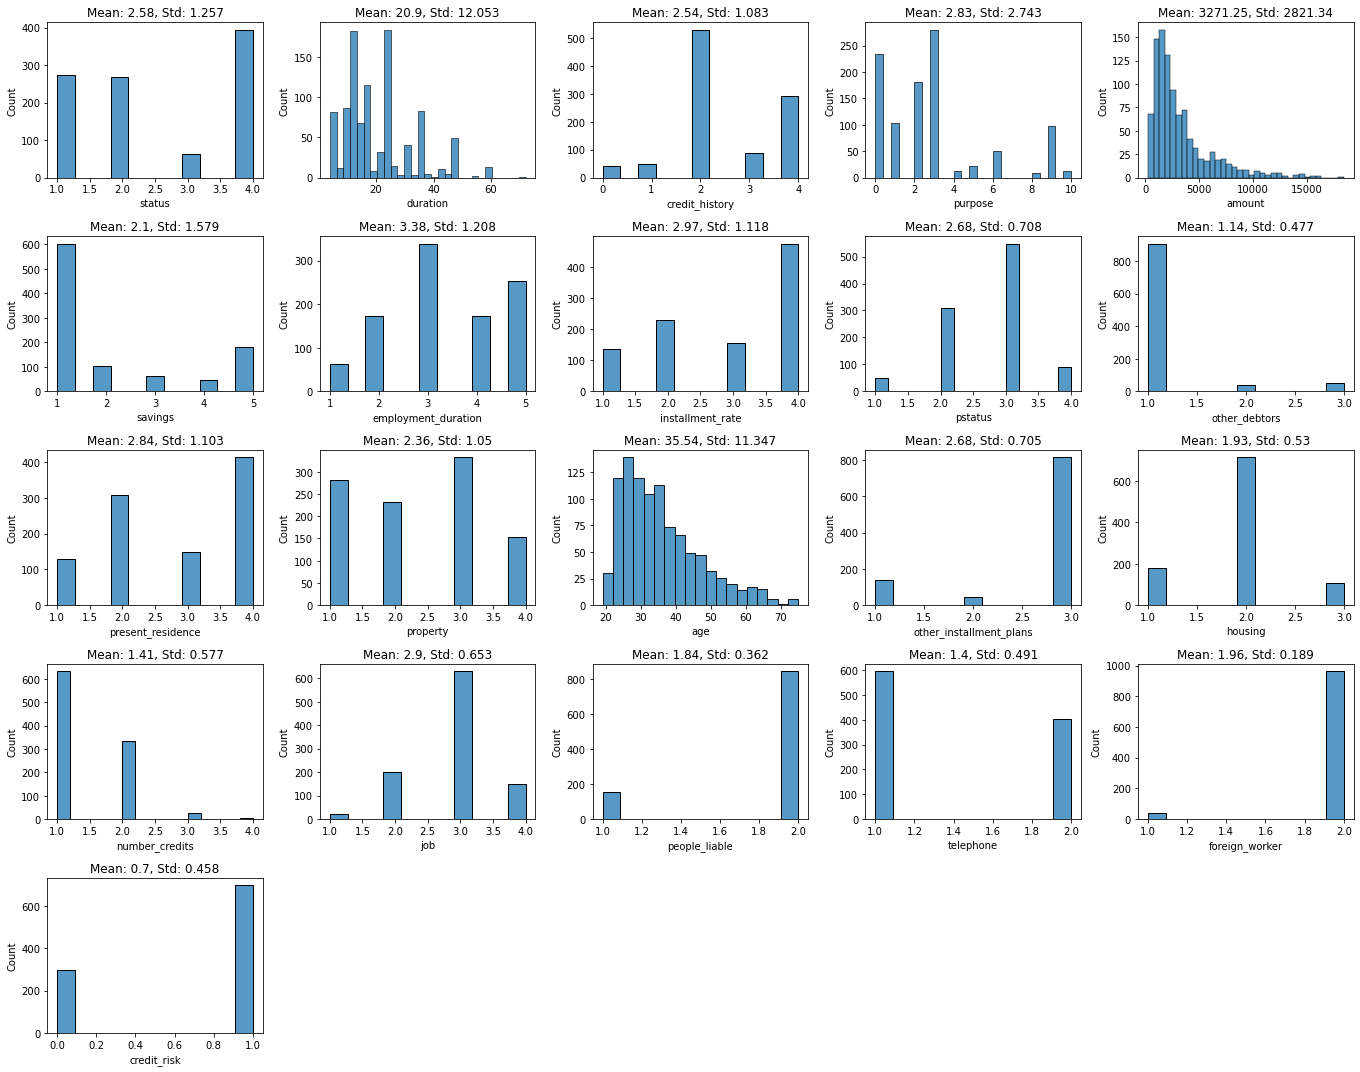

In [9]:
plot_hist(5,5,df)

In [5]:
pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')


,Unique Values
Variable,
status,4
duration,33
credit_history,5
purpose,10
amount,923
savings,5
employment_duration,5
installment_rate,4
pstatus,4


## Encoding the variable types

In [8]:
ordinal_variables = ['status',
                     'savings', 
                     'employment_duration',
                     'installment_rate',
                     'present_residence', 
                     'number_credits']
numerical_variables = ['duration',
                       'amount',
                       'age']
categorical_variables = ['credit_history',
                         'purpose',
                         'pstatus',
                         'other_debtors',
                         'property',
                         'other_installment_plans',
                         'housing',
                         'job']
binary_variables = ['people_liable',
                    'telephone',
                    'foreign_worker']

In [14]:
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder
lb, oe = LabelBinarizer(), OrdinalEncoder(dtype = 'int64')
#Encode the ordinal variables first:
for column in ordinal_variables:
    df[column] = oe.fit_transform(df[[column]])

In [15]:
#Encode the binary variables:
#The encoding had to be manual, because of the naming of the labels
df.replace({'people_liable': {2 : 0}}, inplace = True)
df.replace({'telephone': {1 : 0, 2 : 1}}, inplace = True)
df.replace({'foreign_worker': {2 : 0}}, inplace = True)

In [16]:
#One hot encoding for the categorical variables:
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)

## Scaling the numerical values

In [27]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
mm = MinMaxScaler()
pt= PowerTransformer(standardize = False)

In [28]:
#Only min_max scaler for the ordinal variables:
for column in [ordinal_variables]:
    df[column] = mm.fit_transform(df[column])

In [29]:
#Power Transformer to the numerical values, followed by min_max scaling:
for column in [numerical_variables]:
    df[column] = pt.fit_transform(df[column])
    df[column] = mm.fit_transform(df[column])

In [30]:
df.to_csv('credit.csv', index = False)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status,1000.0,0.525667,0.419213,0.0,0.000000,0.333333,1.000000,1.0
duration,1000.0,0.490888,0.203530,0.0,0.350253,0.491041,0.593546,1.0
amount,1000.0,0.560660,0.177976,0.0,0.432226,0.556519,0.677977,1.0
savings,1000.0,0.276250,0.395006,0.0,0.000000,0.000000,0.500000,1.0
employment_duration,1000.0,0.596000,0.302077,0.0,0.500000,0.500000,1.000000,1.0
installment_rate,1000.0,0.657667,0.372905,0.0,0.333333,0.666667,1.000000,1.0
present_residence,1000.0,0.615000,0.367906,0.0,0.333333,0.666667,1.000000,1.0
age,1000.0,0.533704,0.220017,0.0,0.372850,0.539476,0.706588,1.0
number_credits,1000.0,0.135667,0.192551,0.0,0.000000,0.000000,0.333333,1.0
people_liable,1000.0,0.155000,0.362086,0.0,0.000000,0.000000,0.000000,1.0


In [32]:
df.drop(columns = 'telephone', inplace = True)

## Helper funtion to plot histograms

In [7]:
def plot_hist(n, m, data):
    fig, axList = plt.subplots(nrows=n, ncols=m)
    axList = axList.flatten()
    fig.set_size_inches(3.8*m,3*n)
    for ax in enumerate(axList):
        loc = ax[0]
        ax = ax[1]
        if loc < len(data.columns):
            sns.histplot(df, x = data.iloc[:,loc], ax = ax, legend = False)
            mean = np.around(np.mean(data.iloc[:,loc]), 2)
            s_dev = np.around(np.std(data.iloc[:,loc]), 3)
            ax.set(title= 'Mean: ' + str(mean) + ', Std: ' + str(s_dev))
        if loc >= len(data.columns):
            ax.axis("off")
    plt.tight_layout()

# Exploratory Data Analysis

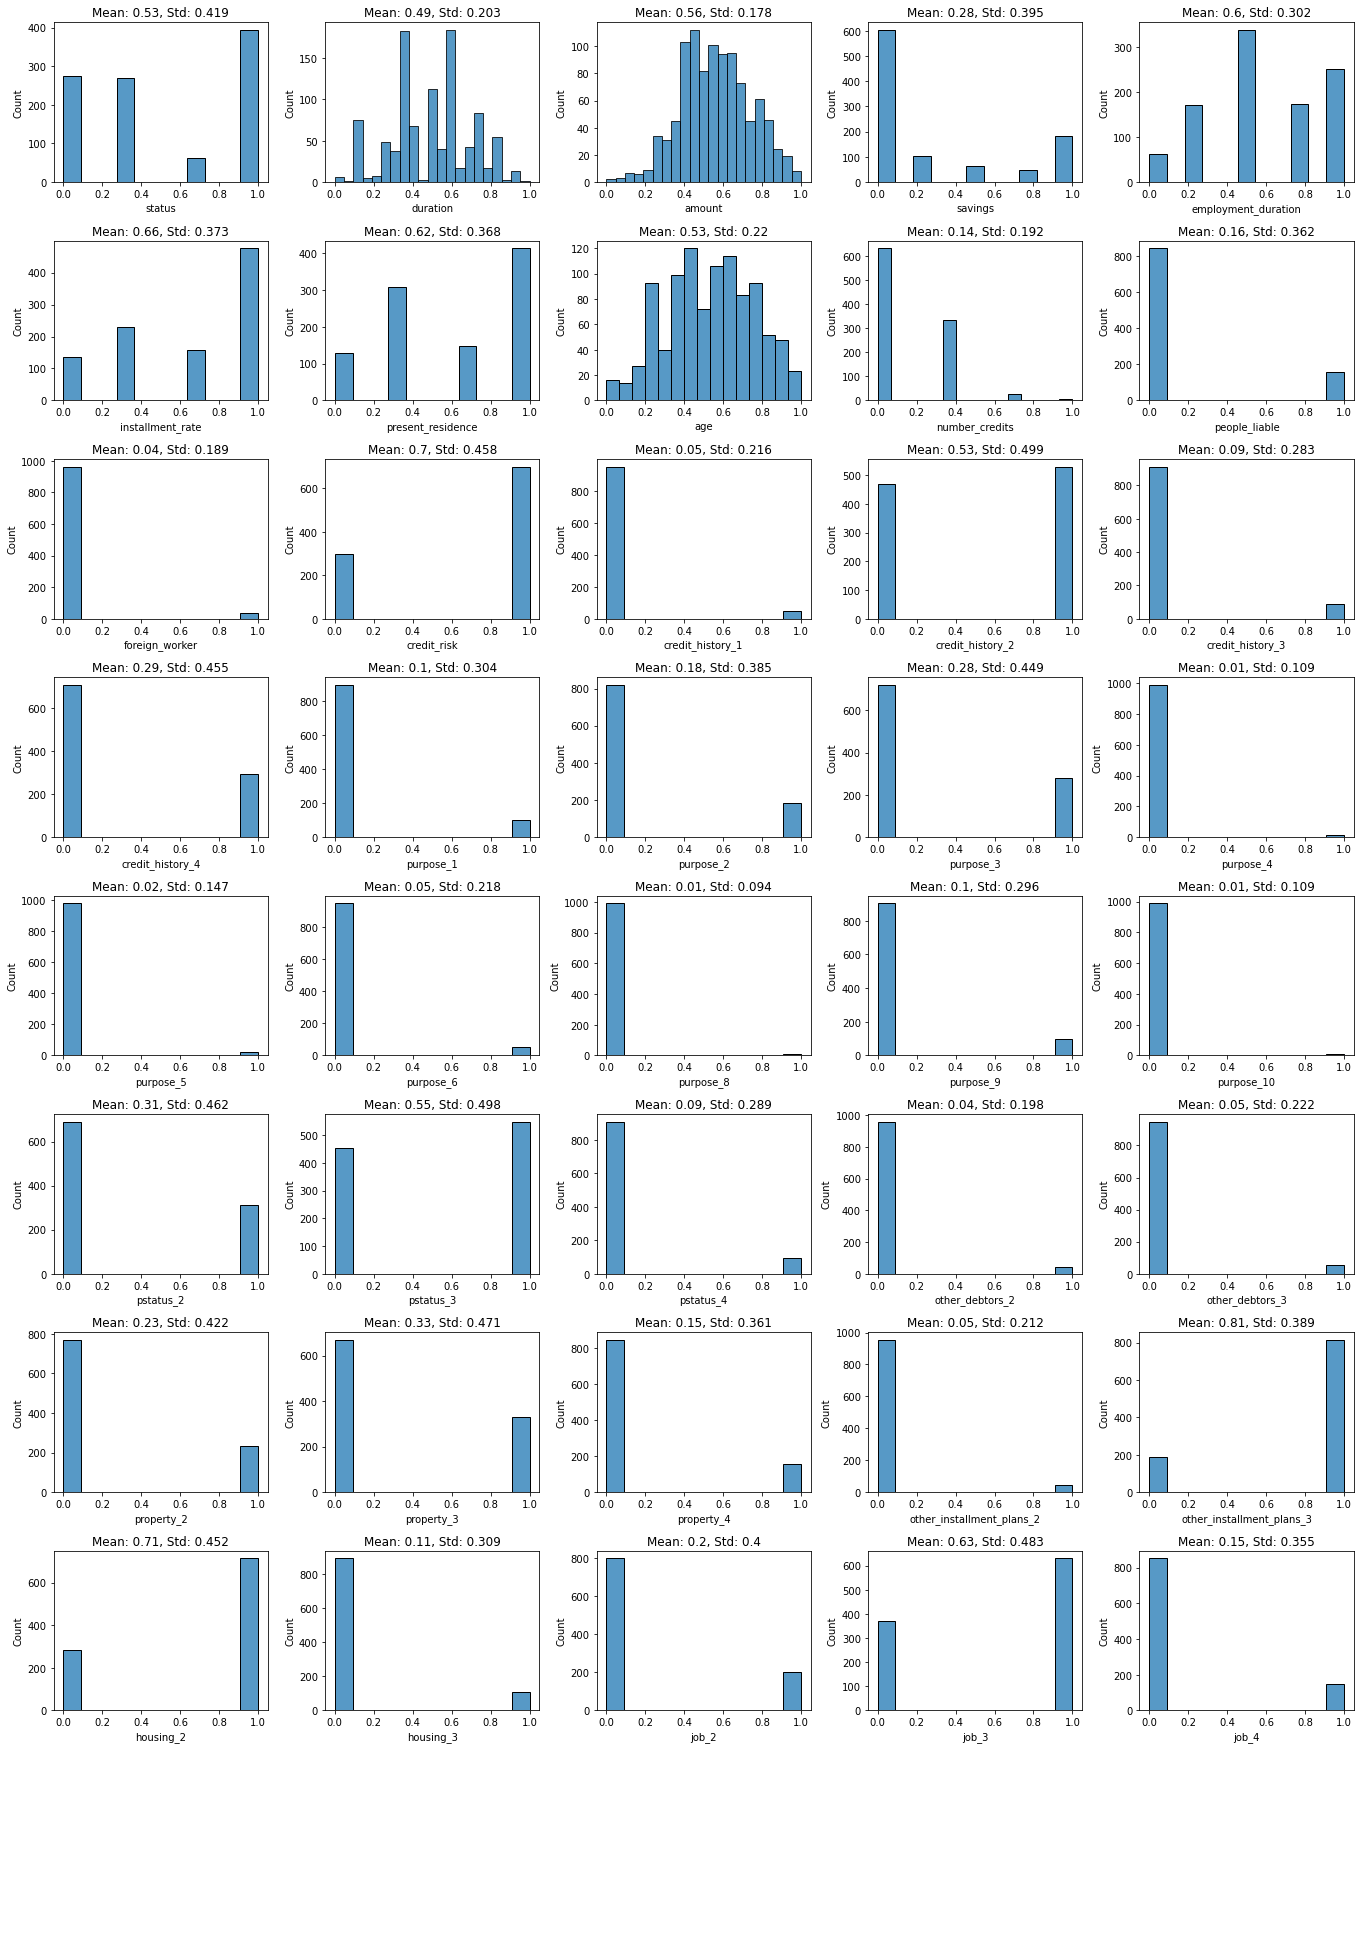

In [34]:
plot_hist(9,5,df)

The test data comes from the original dataset, for the sake of curiosity test samples will be randomly sampled trying to match the distribution of the original data set. For the features that have less than 11 cetegories, these will be sampled using random.choice from numpy. Whereas the values that have more categories, it will be assumed they are continuous and a skewed normal distribution will be fit to these data, in order to generate a random sample that emulates the initial data.

In [48]:
#Create a dictionary with the probability of each label to be used with random.choice and skewnrom.rvs to create the Monte Carlo Simulation
p = {}
for column in df.columns:
    #If the amount of labels is less than 11, we get the probability of each label:
    if len(df[column].value_counts()) <= 11:
        p[column] = {'a': list(df[column].value_counts(normalize = True).index),
                     'p': list(df[column].value_counts(normalize = True))}
    #If the amount of labels is greater than 11, we fit a skewed normal distribution to get the parameters 
    #that can be used to random sample from the column.
    else:
        p[column] = {'a': skewnorm.fit(df[column])[0], 
                     'loc': skewnorm.fit(df[column])[1],
                    'scale': skewnorm.fit(df[column])[2]}

In [49]:
p['duration']

{'a': 28.190131562639234,
 'loc': 0.01639612222616024,
 'scale': 0.29210066785366684}

In [50]:
p['number_credits']

{'a': [0.0, 0.3333333333333333, 0.6666666666666666, 1.0],
 'p': [0.633, 0.333, 0.028, 0.006]}

(0.2995604335447961,
 0.1962356641977744,
 -0.00280947448584392,
 1.0272508216608305)

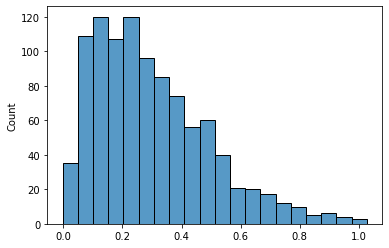

In [51]:
#Create a skewed normal distribution according to the fit parameters for the age column:
col = 'age'
r = skewnorm.rvs(p[col]['a'], size=1000, loc = p[col]['loc'], scale = p[col]['scale'])
sns.histplot(r, legend = False)
np.mean(r), np.std(r), min(r), max(r)

In [52]:
df[col].describe(), pd.DataFrame(r).describe()

(count    1000.000000
 mean        0.295393
 std         0.202726
 min         0.000000
 25%         0.142857
 50%         0.250000
 75%         0.410714
 max         1.000000
 Name: age, dtype: float64,
                  0
 count  1000.000000
 mean      0.299560
 std       0.196334
 min      -0.002809
 25%       0.144072
 50%       0.258837
 75%       0.413695
 max       1.027251)

There is enough variation in between the data age column, and the randomly sampled age column. This variation is exactly what is wanted to test the perfomance of the model on a test data that's beyond the on available on the data set.

(0.5476666666666666, 0.4165401141146753, 0.0, 1.0)

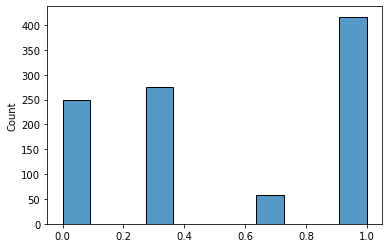

In [53]:
col = 'status'
s = np.random.choice(a = p[col]['a'], size = 1000, p = p[col]['p'])
sns.histplot(s, legend = False)
np.mean(s), np.std(s), min(s), max(s)

<AxesSubplot:>

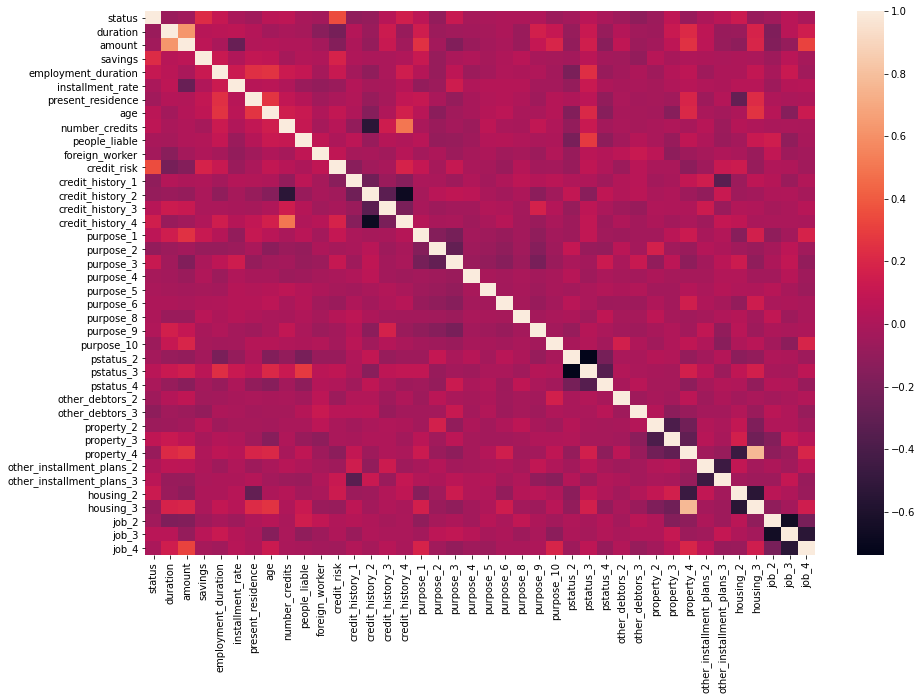

In [54]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr())